### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import collections
InteractiveShell.ast_note_interactivity='all'
import warnings
warnings.filterwarnings('ignore')
import time
%matplotlib inline

In [2]:
df=pd.read_csv('Historical_train.csv')
# reading dataset

In [3]:
df
# loading dataset

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,52836,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,73653,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,30992,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,64361,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,8985,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192,51932,57924,Historical,3059530,S,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,22410,22917,Historical,57540,D,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,11934,12265,Historical,2471534,D,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,30764,31440,Historical,567658,D,8,1,973353,105.95,2008,45,52.69,23.99,0


# Data Understanding

In [4]:
df.isnull().sum()
# no null values

Unnamed: 0          0
Order               0
File_Type           0
SKU_number          0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
SoldFlag            0
dtype: int64

In [5]:
df.dtypes
# displaying the type of data present in the columns

Unnamed: 0            int64
Order                 int64
File_Type            object
SKU_number            int64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor        int64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
SoldFlag              int64
dtype: object

In [6]:
df.info()
# displaying the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53197 entries, 0 to 53196
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        53197 non-null  int64  
 1   Order             53197 non-null  int64  
 2   File_Type         53197 non-null  object 
 3   SKU_number        53197 non-null  int64  
 4   MarketingType     53197 non-null  object 
 5   ReleaseNumber     53197 non-null  int64  
 6   New_Release_Flag  53197 non-null  int64  
 7   StrengthFactor    53197 non-null  int64  
 8   PriceReg          53197 non-null  float64
 9   ReleaseYear       53197 non-null  int64  
 10  ItemCount         53197 non-null  int64  
 11  LowUserPrice      53197 non-null  float64
 12  LowNetPrice       53197 non-null  float64
 13  SoldFlag          53197 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 5.7+ MB


In [7]:
df.head()
# displaying the head of dataframe

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,52836,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,73653,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,30992,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,64361,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,8985,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0


In [8]:
df.tail()

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
53192,51932,57924,Historical,3059530,S,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,22410,22917,Historical,57540,D,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,11934,12265,Historical,2471534,D,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,30764,31440,Historical,567658,D,8,1,973353,105.95,2008,45,52.69,23.99,0
53196,38124,41875,Historical,183696,S,3,1,4138946,242.95,2006,19,13.90,53.89,0


In [9]:
df.shape
# 53197 rows and 14 columns 

(53197, 14)

In [10]:
df.keys()
# column names

Index(['Unnamed: 0', 'Order', 'File_Type', 'SKU_number', 'MarketingType',
       'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor', 'PriceReg',
       'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice', 'SoldFlag'],
      dtype='object')

### Above there is an Unnamed Coloumn so we will drop it from our dataset.

In [11]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [12]:
df1

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
0,58868,Historical,266198,S,0,0,1255901,32.50,2004,26,27.57,10.99,0
1,82447,Historical,2405151,S,0,0,208404,70.00,1988,21,15.99,40.02,1
2,31672,Historical,528384,D,9,1,50339,324.95,2013,53,149.73,123.94,0
3,71808,Historical,571691,S,4,1,1361255,39.95,2005,67,10.59,7.59,0
4,9256,Historical,2363274,D,1,0,3760024,144.00,2004,13,43.94,33.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192,57924,Historical,3059530,S,0,0,607526,99.95,2003,22,253.92,99.76,0
53193,22917,Historical,57540,D,11,1,362378,30.60,2006,87,93.98,18.97,1
53194,12265,Historical,2471534,D,2,1,6046130,40.95,1996,16,0.00,32.48,0
53195,31440,Historical,567658,D,8,1,973353,105.95,2008,45,52.69,23.99,0


### SoldFlag column is our TargetVariable.

In [13]:
df1.describe()
# To understand the mean median mode and quartiles we use the describe function.

,Order,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,SoldFlag
count,53197.000000,5.319700e+04,53197.000000,53197.00000,5.319700e+04,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000,53197.000000
mean,41705.437224,6.526196e+05,4.125797,0.78824,1.216757e+06,99.004026,2005.971389,43.941651,56.455537,47.335423,0.171006
std,25035.602066,6.873272e+05,3.895184,0.40856,1.524907e+06,80.631333,6.098045,37.515901,99.006290,139.049743,0.376518
min,2.000000,5.000100e+04,0.000000,0.00000,6.800000e+01,0.000000,1945.000000,0.000000,0.000000,0.000000,0.000000
25%,19504.000000,1.700050e+05,2.000000,1.00000,2.432250e+05,49.950000,2003.000000,22.000000,20.190000,18.710000,0.000000
50%,41578.000000,5.409570e+05,3.000000,1.00000,7.155000e+05,78.950000,2007.000000,34.000000,44.000000,36.080000,0.000000
75%,63555.000000,7.597100e+05,6.000000,1.00000,1.552432e+06,127.950000,2010.000000,53.000000,79.590000,56.980000,0.000000
max,85106.000000,3.959831e+06,99.000000,1.00000,1.666966e+07,3986.310000,2016.000000,1426.000000,14140.210000,19138.790000,1.000000


### Data Visualisation

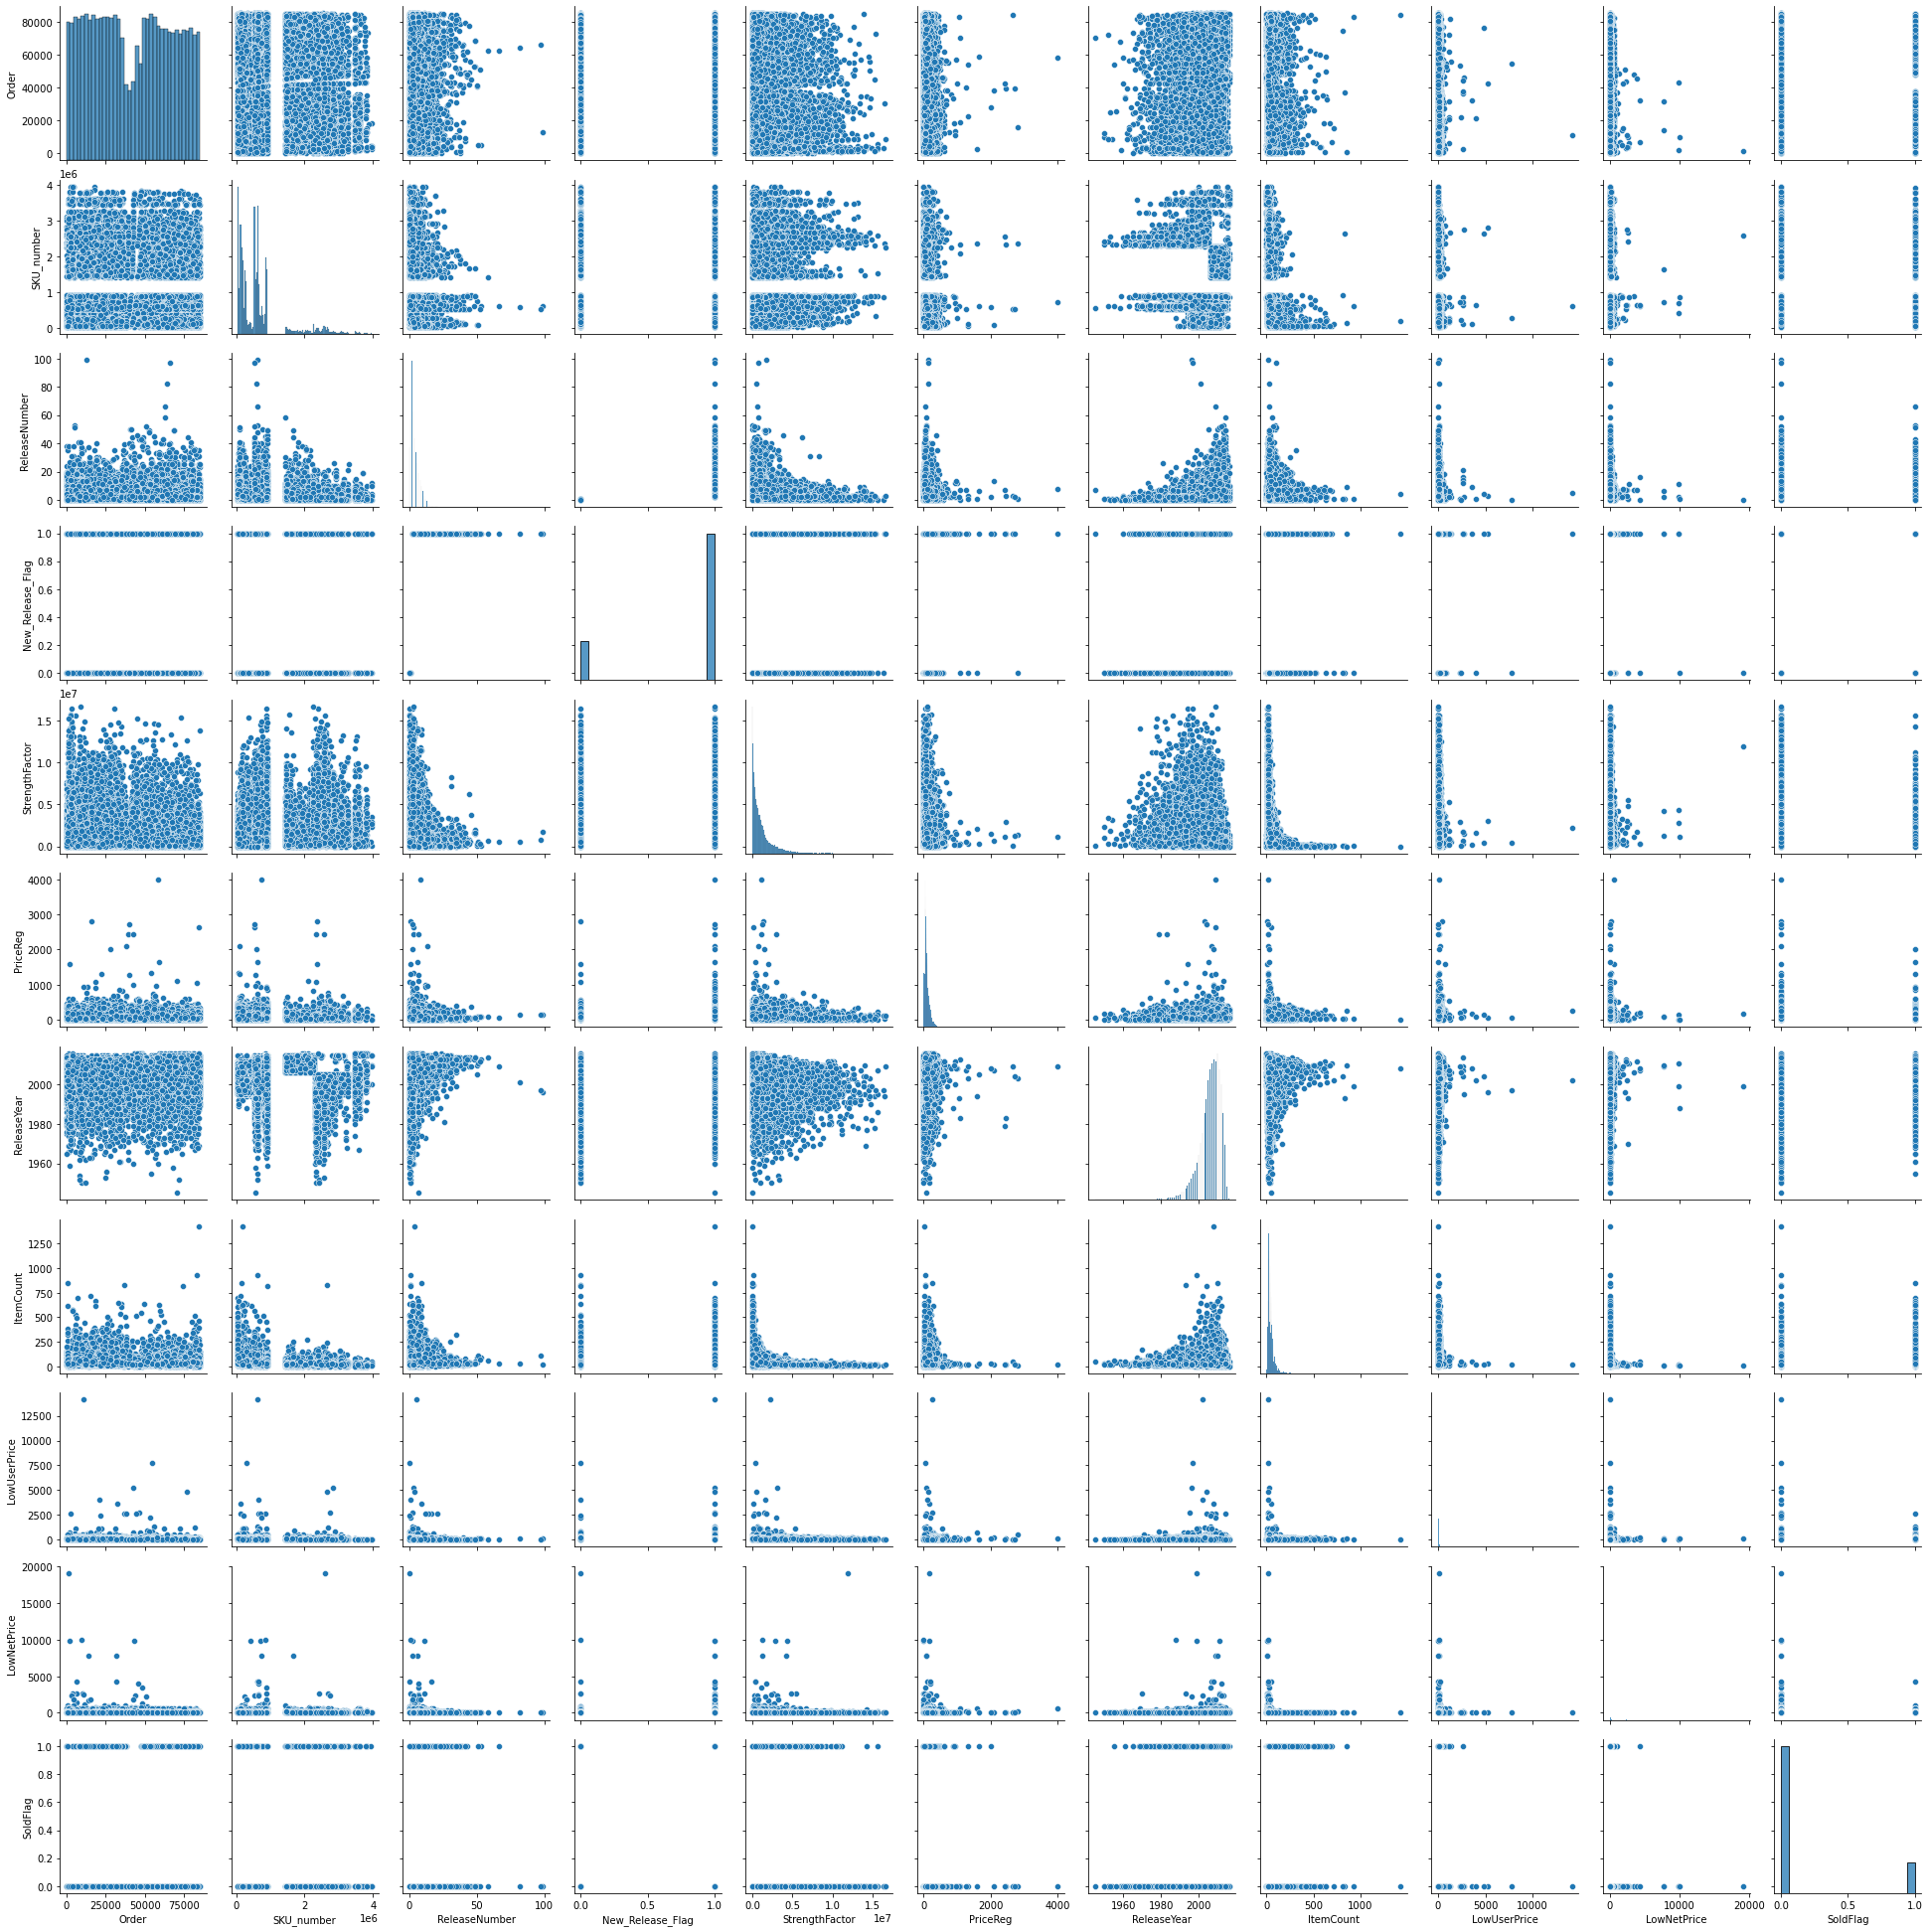

In [14]:
sns.pairplot(data=df1)

### Finding Outliers.

<AxesSubplot:xlabel='SoldFlag', ylabel='LowUserPrice'>

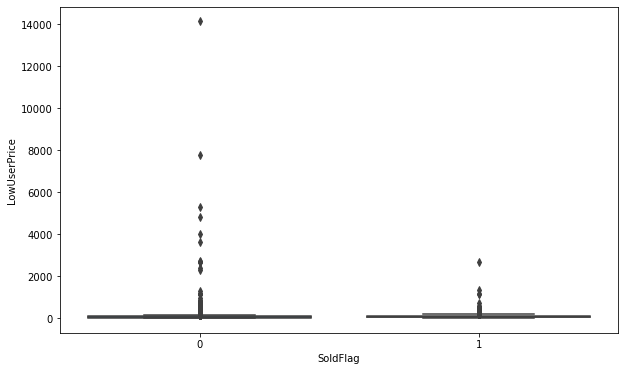

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SoldFlag',y='LowUserPrice',data=df1)

####  As we can see there are outliers in the data

## Univariate Analysis of all Columns at once.

[]

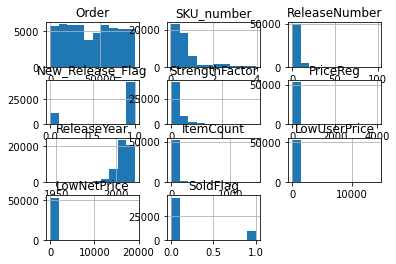

In [16]:
df1.hist()
plt.xlabel('ItemCount')
plt.ylabel('LowUserPrice')
plt.plot()

### DataVisualisation and Understanding the relationships in the data.

### BiVariate Analysis

<AxesSubplot:xlabel='SoldFlag', ylabel='LowUserPrice'>

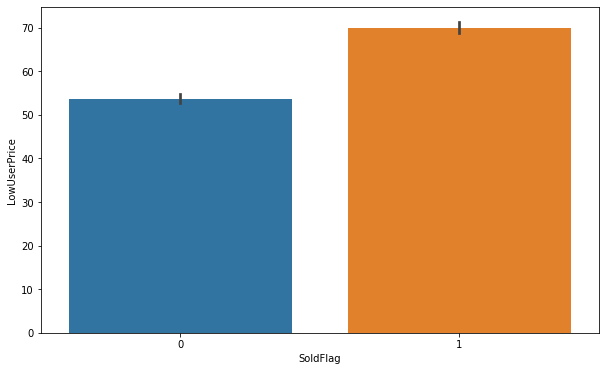

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SoldFlag',y='LowUserPrice',data=df1)

<AxesSubplot:xlabel='SoldFlag', ylabel='LowNetPrice'>

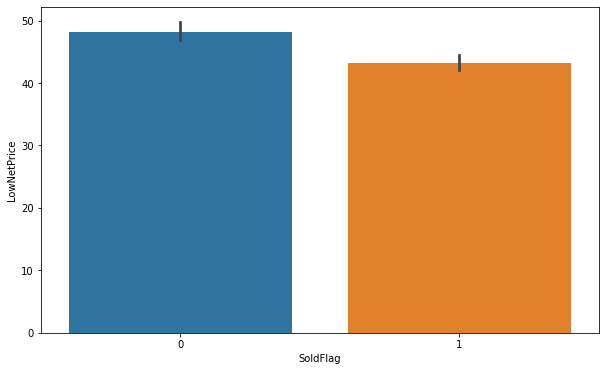

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SoldFlag',y='LowNetPrice',data=df1)

<AxesSubplot:xlabel='MarketingType', ylabel='PriceReg'>

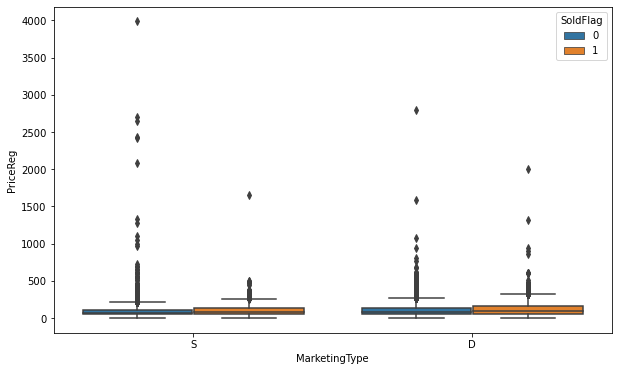

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MarketingType',y='PriceReg',hue='SoldFlag',data=df1)

##### Above we can see that the marketing type for type 'S' is high with an outlier with 4000 PriceReg and the minimum price is within 2000 and for type 'D' marketing stratergy the maximum price is 3000 and minimum being 2000.

## Below is the heatmap for PriceReg,ItemCount,LowUserPrice,LowNetPrice and SoldFlag.

<AxesSubplot:>

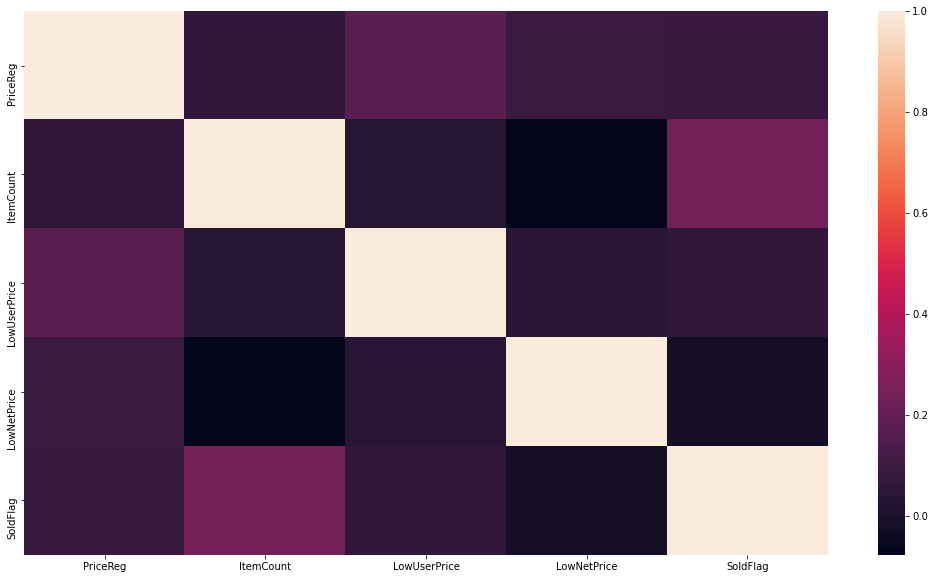

In [20]:
corre=df1[['PriceReg','ItemCount','LowUserPrice','LowNetPrice','SoldFlag']].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corre)

In [21]:
df1 = pd.get_dummies(df1)
### We need Dummie variable for marketingtype variable

## TrainTestSplit

In [22]:
#importing library
from sklearn.model_selection import train_test_split

In [23]:
x=df1.drop(['SoldFlag'],axis=1)
y=df1['SoldFlag']

In [24]:
x

,Order,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,File_Type_Historical,MarketingType_D,MarketingType_S
0,58868,266198,0,0,1255901,32.50,2004,26,27.57,10.99,1,0,1
1,82447,2405151,0,0,208404,70.00,1988,21,15.99,40.02,1,0,1
2,31672,528384,9,1,50339,324.95,2013,53,149.73,123.94,1,1,0
3,71808,571691,4,1,1361255,39.95,2005,67,10.59,7.59,1,0,1
4,9256,2363274,1,0,3760024,144.00,2004,13,43.94,33.99,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192,57924,3059530,0,0,607526,99.95,2003,22,253.92,99.76,1,0,1
53193,22917,57540,11,1,362378,30.60,2006,87,93.98,18.97,1,1,0
53194,12265,2471534,2,1,6046130,40.95,1996,16,0.00,32.48,1,1,0
53195,31440,567658,8,1,973353,105.95,2008,45,52.69,23.99,1,1,0


In [25]:
y

0        0
1        1
2        0
3        0
4        0
        ..
53192    0
53193    1
53194    0
53195    0
53196    0
Name: SoldFlag, Length: 53197, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(42557, 13) (10640, 13) (42557,) (10640,)


### 1.Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,auc,accuracy_score,f1_score,precision_score,confusion_matrix,roc_auc_score,roc_curve

In [28]:
#fit the model on train data
log_reg = LogisticRegression().fit(x_train, y_train)

#predict on train
train_preds = log_reg.predict(x_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(y_train, train_preds))

#predict on test
test_preds = log_reg.predict(x_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(y_test, test_preds))

#We got good accuracy which means our model is performing quite well
#ROC
print("ROC score on train is: ", roc_auc_score(y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(y_test, test_preds))

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(y_test, test_preds))


Model accuracy on train is:  0.8290762976713584
Model accuracy on test is:  0.8286654135338346
ROC score on train is:  0.5
ROC score on test is:  0.5
confusion_matrix train is:  [[35283     0]
 [ 7274     0]]
confusion_matrix test is:  [[8817    0]
 [1823    0]]


### The accuracy on train and test data is 82 percent

### 2. Decision Tree.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model=DecisionTreeClassifier().fit(x,y)

In [31]:
from sklearn.metrics import classification_report,auc,accuracy_score,f1_score,precision_score,confusion_matrix,roc_auc_score,roc_curve

In [32]:
#predicting train
train_preds=model.predict(x_train)
#train accuracy
print('Model accuracy on train is: ',accuracy_score(y_train,train_preds))
#predicting on test
test_preds=model.predict(x_test)
#accuracy on test
print('Model accuracy on test is: ',accuracy_score(y_test,test_preds))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0


In [33]:
from sklearn.metrics import cohen_kappa_score
import innomatics

In [34]:
y_pred = model.predict(x_test)
y_pred_prob= model.predict_proba(x_test)[:,1]# considering probability of 1
y_pred_prob[:10]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [35]:
y_pred=model.predict(x_test)

In [36]:
cohen_kappa_score(y_test,y_pred)

1.0

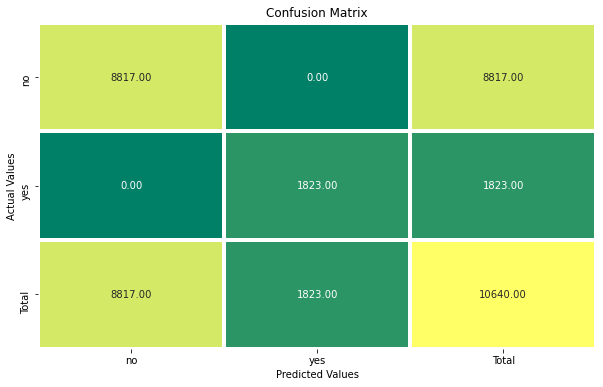

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8817
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     10640
   macro avg       1.00      1.00      1.00     10640
weighted avg       1.00      1.00      1.00     10640


************************************Kappa Score************************************


Kappa Score = 1.0

******************************Area Under Curve Score******************************


AUC Score = 1.0
Number of probabilities to build ROC = 3


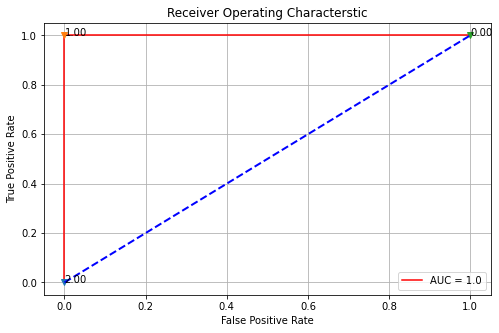

In [37]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,
                                 ['no','yes'],n=1,verbose=True)

### 3. K-Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model = KNeighborsClassifier(n_neighbors=5,
                             metric='minkowski',p=2)

In [40]:
model.fit(x_train,y_train)  # Training 

KNeighborsClassifier()

In [41]:
y_pred = model.predict(x_test)
y_pred_prob= model.predict_proba(x_test)[:,1]# considering probability of 1
y_pred_prob[:10]

array([0. , 0. , 0. , 0.2, 0.2, 0. , 0.2, 0. , 0. , 0.2])

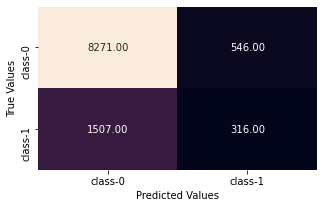

In [42]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))

sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [43]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8817
           1       0.37      0.17      0.24      1823

    accuracy                           0.81     10640
   macro avg       0.61      0.56      0.56     10640
weighted avg       0.76      0.81      0.78     10640



In [44]:
cohen_kappa_score(y_test,y_pred)

0.14086728828814232

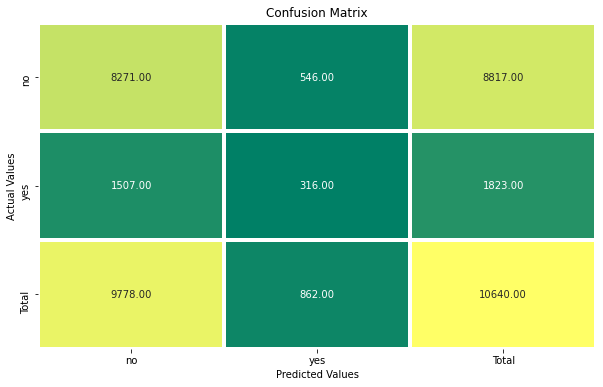

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8817
           1       0.37      0.17      0.24      1823

    accuracy                           0.81     10640
   macro avg       0.61      0.56      0.56     10640
weighted avg       0.76      0.81      0.78     10640


************************************Kappa Score************************************


Kappa Score = 0.14086728828814232

******************************Area Under Curve Score******************************


AUC Score = 0.5557074110870569
Number of probabilities to build ROC = 7


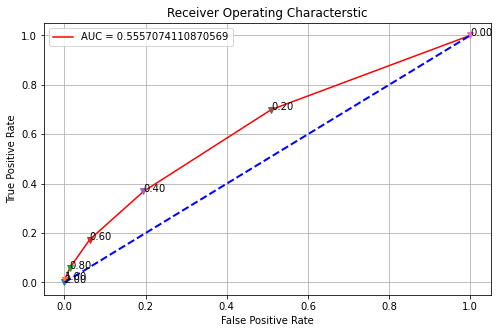

In [45]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,
                                 ['no','yes'],n=1,verbose=True)

### Accuracy for the KNN Model is 0.81 that is 81 percent

### 4. RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [47]:
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
from sklearn import metrics

In [49]:
print(metrics.accuracy_score(y_test,random_forest_classifier.predict(x_test)))

0.8345864661654135


### The Accuracy for RandomForest is 83 percent

In [50]:
print(metrics.classification_report(y_test,random_forest_classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8817
           1       0.56      0.17      0.26      1823

    accuracy                           0.83     10640
   macro avg       0.70      0.57      0.58     10640
weighted avg       0.80      0.83      0.80     10640



In [51]:
random_forest_classifier.feature_importances_

array([0.15186291, 0.11383038, 0.05678421, 0.00714977, 0.13447217,
       0.10734761, 0.06727096, 0.12639118, 0.10535406, 0.10495515,
       0.        , 0.01226004, 0.01232156])

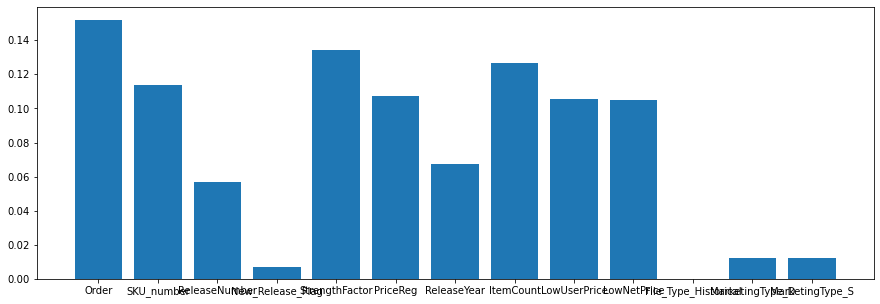

In [52]:
plt.figure(figsize=(15,5)),
plt.bar( x_train.columns,random_forest_classifier.feature_importances_);

### The top 4 factors contributing to the data are 'Order',''StrengthFactor','ItemCount' and 'LowNetPrice'

## Importing Testdata

In [53]:
df2=pd.read_csv('Historical_test_without_target.csv')

In [54]:
df2

,Unnamed: 0,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,36640,38309,Historical,114538,S,2,1,1349864,122.20,2003,25,16.24,10.94
1,24484,25026,Historical,259365,D,6,1,410348,56.00,2003,51,127.72,29.94
2,64696,72200,Historical,147658,S,1,0,92099,84.95,2011,20,0.00,0.00
3,65090,72652,Historical,148208,S,5,1,801001,185.95,2004,21,4.33,86.83
4,32653,33380,Historical,124687,D,2,1,1051302,65.00,2006,60,26.80,28.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22794,75283,84315,Historical,663930,S,18,1,18044,107.00,2013,44,41.99,58.52
22795,5984,6215,Historical,544565,D,10,1,9876,254.95,2013,113,120.17,79.27
22796,64986,72541,Historical,2404633,S,1,0,778672,55.00,1995,59,0.00,32.24
22797,60953,67964,Historical,877289,S,4,1,4947423,10.51,2008,47,129.31,11.53


In [55]:
ddf=df2.drop(['Unnamed: 0'],axis=1)

In [56]:
ddf

,Order,File_Type,SKU_number,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,38309,Historical,114538,S,2,1,1349864,122.20,2003,25,16.24,10.94
1,25026,Historical,259365,D,6,1,410348,56.00,2003,51,127.72,29.94
2,72200,Historical,147658,S,1,0,92099,84.95,2011,20,0.00,0.00
3,72652,Historical,148208,S,5,1,801001,185.95,2004,21,4.33,86.83
4,33380,Historical,124687,D,2,1,1051302,65.00,2006,60,26.80,28.99
...,...,...,...,...,...,...,...,...,...,...,...,...
22794,84315,Historical,663930,S,18,1,18044,107.00,2013,44,41.99,58.52
22795,6215,Historical,544565,D,10,1,9876,254.95,2013,113,120.17,79.27
22796,72541,Historical,2404633,S,1,0,778672,55.00,1995,59,0.00,32.24
22797,67964,Historical,877289,S,4,1,4947423,10.51,2008,47,129.31,11.53


## Test Predictions

In [57]:
ddf.shape

(22799, 12)

In [58]:
df1.shape

(53197, 14)

In [59]:
ddf = pd.get_dummies(ddf)

In [61]:
train_preds= log_reg.predict(ddf)

In [62]:
ddf['SoldFlag'] = train_preds

In [63]:
ddf.head()

,Order,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,File_Type_Historical,MarketingType_D,MarketingType_S,SoldFlag
0,38309,114538,2,1,1349864,122.20,2003,25,16.24,10.94,1,0,1,0
1,25026,259365,6,1,410348,56.00,2003,51,127.72,29.94,1,1,0,0
2,72200,147658,1,0,92099,84.95,2011,20,0.00,0.00,1,0,1,0
3,72652,148208,5,1,801001,185.95,2004,21,4.33,86.83,1,0,1,0
4,33380,124687,2,1,1051302,65.00,2006,60,26.80,28.99,1,1,0,0


In [64]:
ddf.to_csv('final_prediction12.csv')